
Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  4


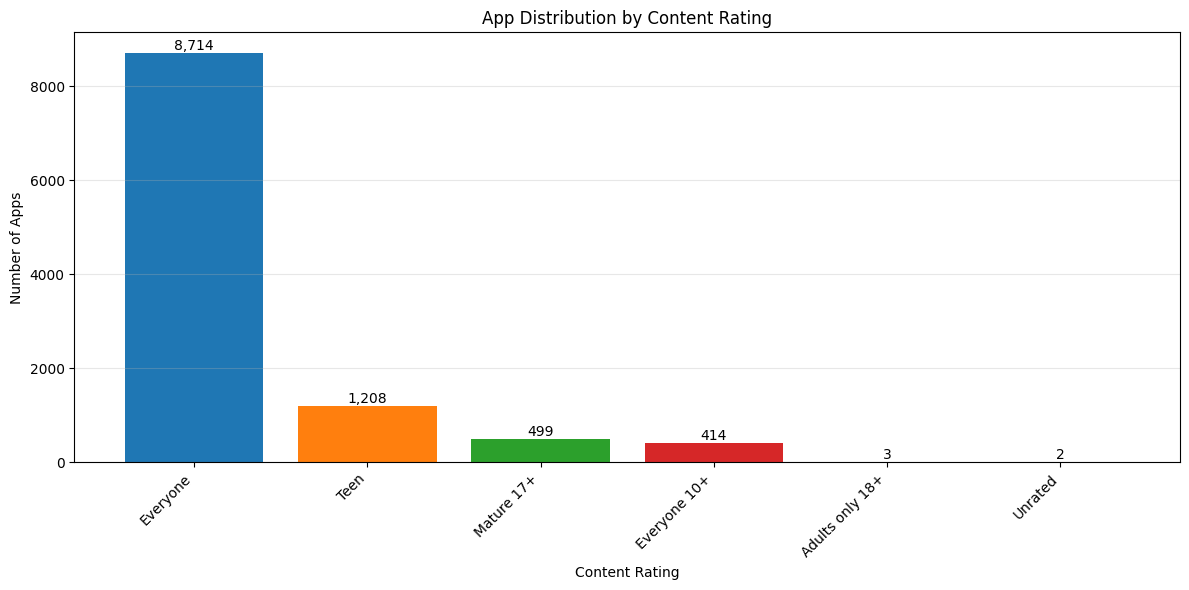


Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  5


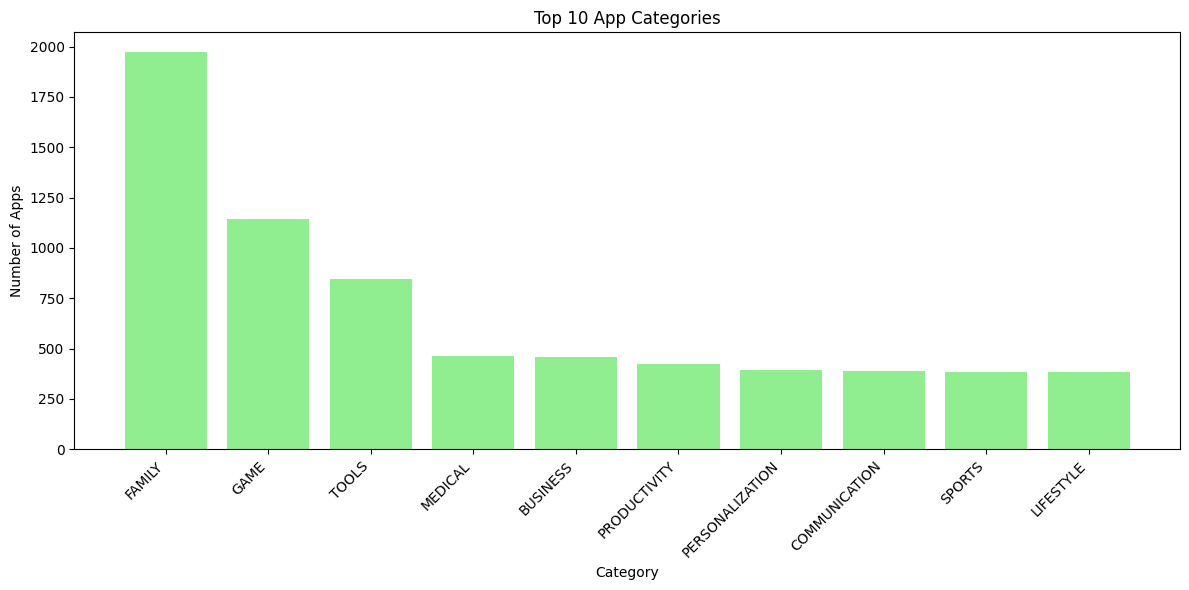


Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  6


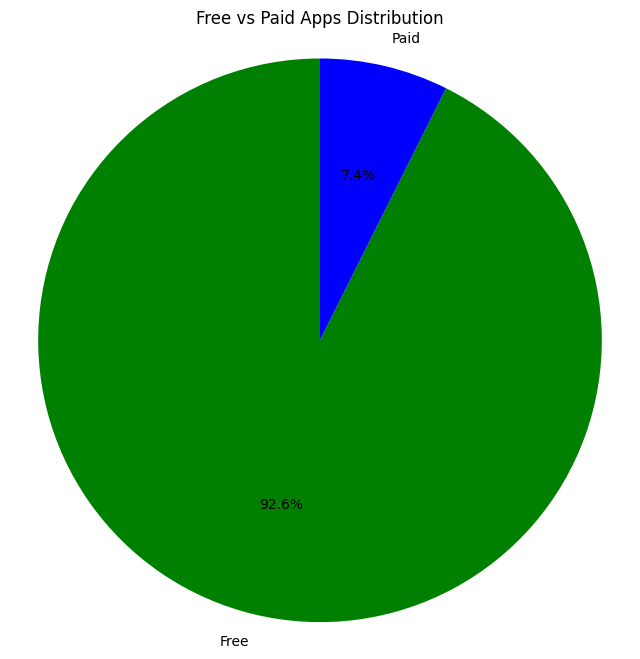


Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  3


('Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', 4.1, '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up') 

('U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', 4.7, '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up') 

('Sketch - Draw & Paint', 'ART_AND_DESIGN', 4.5, '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up') 

('Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', 4.3, '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up') 

('Paper flowers instructions', 'ART_AND_DESIGN', 4.4, '167', '5.6M', '50,000+', 'Free', '0', 'Everyone', 'Art & Design', 'March 26, 2017', '1.0', '2.3 and up') 

('Infinite Painter', 'ART_AND_DESIGN', 4.1, '36815', '29M', '1,000,000+', 'Free', '0', 'Everyone', 'A

Enter your choice (1-7):  2

Enter app name to update (or leave blank to exit):  


Update mode exited.

Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  1
App:  Rac gindat
Category:  Isev rac gindat
Rating:  4.0
Reviews:  1000
Size:  1000\
Installs:  1000
Type:  Diax
Price:  0
Content Rating:  Diax
Genres:  Dax
Last Updated:  idk
Current Ver:  idk
Android Ver:  idk


Data added successfully!

Main Menu:
1. Add new app
2. Update existing app
3. View high-rated apps
4. Show content rating distribution
5. Show top categories
6. Show free/paid distribution
7. Exit


Enter your choice (1-7):  7


In [1]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("Database.sqlite")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS my_table (
    App TEXT,
    Category TEXT,
    Rating REAL,
    Reviews INTEGER,
    Size TEXT,
    Installs TEXT,
    Type TEXT,
    Price REAL,
    [Content Rating] TEXT,
    Genres TEXT,
    [Last Updated] TEXT,
    [Current Ver] TEXT,
    [Android Ver] TEXT
)
""")
conn.commit()

COLUMNS = [
    'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
    'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'
]

def cont_rating(): #დიაგრამა, რომელიც გვიჩვენებს, როგორ არის განაწილებული აპები ასაკობრივი ზვარით
    cursor.execute("""
    SELECT [Content Rating], COUNT(*) 
    FROM my_table 
    WHERE [Content Rating] IS NOT NULL
    GROUP BY [Content Rating]
    ORDER BY COUNT(*) DESC
    """)
    data = cursor.fetchall()
    
    if not data:
        print("No content rating data available.")
        return
    
    ratings = [row[0] for row in data]
    counts = [row[1] for row in data]
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(ratings, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:,}', ha='center', va='bottom')
    plt.title('App Distribution by Content Rating')
    plt.xlabel('Content Rating')
    plt.ylabel('Number of Apps')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

def top_categories(): #ფუნქცია, რომელიც გვიჩვენებს ტოპ 10 კატეგორიას, რომელიც ჩვენ მონაცემთა ბაზას აქვს გადაცემული, დიაგრამის სახით
    cursor.execute("""
    SELECT Category, COUNT(*) 
    FROM my_table 
    GROUP BY Category 
    ORDER BY COUNT(*) DESC 
    LIMIT 10
    """)
    data = cursor.fetchall()
    categories = [row[0] for row in data]
    counts = [row[1] for row in data]

    plt.figure(figsize=(12, 6))
    plt.bar(categories, counts, color='lightgreen')
    plt.title('Top 10 App Categories')
    plt.xlabel('Category')
    plt.ylabel('Number of Apps')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def paid_vs_free():#ფასიანი და უფასო აპლიკაციების შეფარდება 
    cursor.execute("""
    SELECT Type, COUNT(*) 
    FROM my_table 
    WHERE Type IN ('Free', 'Paid') 
    GROUP BY Type
    """)
    data = cursor.fetchall()
    types = [row[0] for row in data]
    values = [row[1] for row in data]

    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=types, autopct='%1.1f%%', colors=['green', 'blue'], startangle=90)
    plt.title('Free vs Paid Apps Distribution')
    plt.axis('equal')
    plt.show()

def user_add():# ფუნქცია, რომელიც მომხმარებელს აძლევს საშუალებას დაამატოს ახალი აპლიკაცია და შეავსოს მისი პარამეტრები
    values = []
    for col in COLUMNS: #დაურბენს ყველა სვეტს ჩამონათვალში
        while True:
            val = input(f"{col}: ").strip()
            
            if val == "": #ვასწავლით ფუნქციას, თუ როგორ უნდა მოიქცეს, როცა მომხმარებელმა უბრალოდ ენთერს დააჭირა (გამოტოვა სვეტი)
                if col in ["Rating", "Price"]:
                    val = 0.0
                elif col == "Reviews":
                    val = 0
                else:
                    val = None #კონკრეტულად ეს ოპცია DB Browser-ში დაგვიწერს NULL-ს, ვინაიდან ცარიელი სტრინგი არ არის "სიცარიელე" და კოდს უნდა ვასწავლოთ, რომ ცარიელი სტრინგი გარდაქმნას სასურველი შედეგისთვის
                break
                
            try:
                if col in ["Rating", "Price"]:
                    val = float(val)
                elif col == "Reviews":
                    val = int(val)
                break
            except ValueError:
                print(f"Invalid input for {col}. Please enter a valid number.")
        
        values.append(val)

    cursor.execute("SELECT COUNT(*) FROM my_table WHERE LOWER(App) = LOWER(?)", (values[0],)) 
    if cursor.fetchone()[0] > 0:
        print(f"Warning: An app with name '{values[0]}' already exists.")
        if input("Continue anyway? (y/n): ").lower() != 'y':
            return
    #თვითონ დამატების პროცესი. კოდი ითვალისწინებს, რონ შეიძლება მომხმარებელი უკვე არსებულ აპლიკაციას ამატებს და ეკითხება მას? უნდა თუ არა გაგრძელება

    column_names = [f'[{col}]' if ' ' in col else col for col in COLUMNS]
    cursor.execute(
        f"INSERT INTO my_table ({', '.join(column_names)}) VALUES ({', '.join(['?']*len(COLUMNS))})",
        values
    )
    conn.commit()
    print("Data added successfully!")

def user_update(): #მუშაობს ზედა ფუნქციის მსგავსად, თუმცა ეს ფუნქცია ანახლებს უკვე არსებულ აპლიკაციას ბაზაში
    while True:
        app_name = input("\nEnter app name to update (or leave blank to exit): ").strip()
        if not app_name:
            print("Update mode exited.")
            break

        cursor.execute("SELECT App FROM my_table WHERE LOWER(App) = LOWER(?)", (app_name,))
        result = cursor.fetchone()
        
        if not result: #შეიძლება აპლიკაცია არც არსებობდეს. საჭიროა ამის შეტყობინება იუზერისთვის 
            print(f"App '{app_name}' not found.")
            continue
            
        actual_app_name = result[0]

        update_parts = []
        values = []
        
        for col in COLUMNS[1:]:
            val = input(f"{col} (leave blank to keep current): ").strip() #თუკი მომხმარებელს არ სურს შეცვალოს რაიმე პარამეტრი, უბრალოდ უნდა ენთერს ჩაარტყას (ნაზად)
            if val == "": #და აი ეს მოხდება (კოდი უბრალოდ გამოტოვებს ამ კატეგორიას საბოლოო შედეგების შეტანისას)
                continue
                
            try:
                if col in ["Rating", "Price"]:
                    val = float(val)
                elif col == "Reviews":
                    val = int(val)
                
                update_parts.append(f"[{col}] = ?" if ' ' in col else f"{col} = ?")
                values.append(val)
            except ValueError:
                print(f"Invalid value for {col}. Update skipped for this field.")
        
        if not update_parts:
            print("No fields updated.")
            continue
            
        values.append(actual_app_name)
        
        update_query = f"UPDATE my_table SET {', '.join(update_parts)} WHERE App = ?"
        cursor.execute(update_query, values)
        conn.commit()
        print(f"Record '{actual_app_name}' updated successfully.")

def fetch(): #ფუნქცია რომელიც გვიპრინტავს ყველა აპს, რომელიც 4.0-ზე მეტი შეფასებითაა
    cursor.execute("SELECT * FROM my_table WHERE Rating > 4.0")
    results = cursor.fetchall()
    for row in results:
        print(row, '\n')

def main_menu(): #ყველაზე მარტივი მარა ელეგანტური ფუნქცია - უბრალოდ მენიუა. მომხმარებელი ირჩევს რიცხვს და რაცაა მითითებული ეგ ხდება (ვაუ!)
    while True:
        print("\nMain Menu:")
        print("1. Add new app")
        print("2. Update existing app")
        print("3. View high-rated apps")
        print("4. Show content rating distribution")
        print("5. Show top categories")
        print("6. Show free/paid distribution")
        print("7. Exit")
        
        choice = input("Enter your choice (1-7): ").strip()
        
        if choice == "1":
            user_add()
        elif choice == "2":
            user_update()
        elif choice == "3":
            fetch()
        elif choice == "4":
            cont_rating()
        elif choice == "5":
            top_categories()
        elif choice == "6":
            paid_vs_free()
        elif choice == "7":
            conn.close()
            break
        else:
            print("Invalid choice. Please try again.") #თუ, რავი, მომხმარებელს არ ვევასები კონკრეტულად მე და 8 ჩაწერა ან რამე სხვა, თავაზიანად გადავცემთ რომ არასწორი ადამიანია

main_menu() #და აი ასე ლამაზად და ლაკონურად მთავრდება ჩემი 220 ხაზიანი კოდი...